## Weather in Szeged 2006-2016 Temperature Predicting Linear Regression

In this project, we use weather data recorded in Szeged between 2006 and 2016 to build a model for predicting temperature and apparent temperature. The goal is to apply linear regression to estimate temperature values based on other weather features such as humidity, pressure, and wind speed.
    
The workflow includes:
- Loading and preprocessing the dataset (handling missing values, adding removing columns)
- Performing exploratory data analysis (EDA) to study relationships between variables
- Selecting relevant features for modeling
- Training a linear regression model
- Evaluating model performance using metrics such as RMSE and R²

This project is designed both as a practical introduction to regression modeling and as a way to practice making predictions on real-world weather data.

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [147]:
# Data
df = pd.read_csv("weatherHistory.csv")
df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [148]:
# Handling duplicates
df[df.duplicated()].shape

(24, 12)

We have 24 duplicated rows. We will drop them

In [149]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df.tail()

Formatted Date        Summary Precip Type  \
96424  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96425  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96426  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96427  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96428  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
96424        26.016667                 26.016667      0.43            10.9963   
96425        24.583333                 24.583333      0.48            10.0947   
96426        22.038889                 22.038889      0.56             8.9838   
96427        21.522222                 21.522222      0.60            10.5294   
96428        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
96424                    31.0          16.1000         0.0   
96425                    20.0          15.5526         0.0   
96426                    30.0          16.1000         0.0   
96427                    20.0          16.1000         0.0   
96428                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  
96424               1014.36  Partly cloudy starting in the morning.  
96425               1015.16  Partly cloudy starting in the morning.  
96426               1015.66  Partly cloudy starting in the morning.  
96427               1015.95  Partly cloudy starting in the morning.  
96428               1016.16  Partly cloudy starting in the morning.

In [150]:
df.shape

(96429, 12)

We have 12 columns and 96429 rows now.

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96429 entries, 0 to 96428
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96429 non-null  object 
 1   Summary                   96429 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           96429 non-null  float64
 4   Apparent Temperature (C)  96429 non-null  float64
 5   Humidity                  96429 non-null  float64
 6   Wind Speed (km/h)         96429 non-null  float64
 7   Wind Bearing (degrees)    96429 non-null  float64
 8   Visibility (km)           96429 non-null  float64
 9   Loud Cover                96429 non-null  float64
 10  Pressure (millibars)      96429 non-null  float64
 11  Daily Summary             96429 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


We have 4 object, and 8 number columns.

In [152]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Only the Precip Type column contains missing values (517). Compared to the total number of rows (around 96,000), this is a very small fraction, so I will choose to drop them.

In [153]:
df = df.dropna()
df.shape

(95912, 12)

In [154]:
# number columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

In [155]:
df.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     95912.000000              95912.000000  95912.000000   
mean         11.937975                 10.859194      0.734844   
std           9.569620                 10.716711      0.195717   
min         -21.822222                -27.716667      0.000000   
25%           4.594444                  2.272222      0.600000   
50%          12.022222                 12.022222      0.780000   
75%          18.844444                 18.844444      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       95912.000000            95912.000000     95912.000000     95912.0   
mean           10.806764              187.506986        10.362306         0.0   
std             6.920504              107.378309         4.174204         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.812100              116.000000         8.355900         0.0   
50%             9.933700              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          95912.000000  
mean            1003.146959  
std              117.291484  
min                0.000000  
25%             1011.890000  
50%             1016.420000  
75%             1021.050000  
max             1046.380000

- The fact that the means and medians of Temperature and Apparent Temperature are close suggests that their distributions are approximately symmetric, which is consistent with (but does not prove) a normal distribution.
- Since the 25th percentile of Humidity is 0.6, with a minimum of 0, a maximum of 1, and a mean of 0.73, we can infer that the distribution is left-skewed.
- Since the 75th percentile of Wind Speed is 14.13, with a minimum of 0, a maximum of 63.85, and a mean of 10.80, we can infer that the distribution is right-skewed.
- Loud Cover is always 0. So, we can drop this column.

This inferences is enough for now.

In [156]:
# Dropping Loud Cover
df = df.drop("Loud Cover", axis=1)
df.reset_index(drop=True, inplace=True)
num_cols.remove("Loud Cover")
df.tail()

Formatted Date        Summary Precip Type  \
95907  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
95908  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
95909  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
95910  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
95911  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
95907        26.016667                 26.016667      0.43            10.9963   
95908        24.583333                 24.583333      0.48            10.0947   
95909        22.038889                 22.038889      0.56             8.9838   
95910        21.522222                 21.522222      0.60            10.5294   
95911        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
95907                    31.0          16.1000               1014.36   
95908                    20.0          15.5526               1015.16   
95909                    30.0          16.1000               1015.66   
95910                    20.0          16.1000               1015.95   
95911                    39.0          15.5204               1016.16   

                                Daily Summary  
95907  Partly cloudy starting in the morning.  
95908  Partly cloudy starting in the morning.  
95909  Partly cloudy starting in the morning.  
95910  Partly cloudy starting in the morning.  
95911  Partly cloudy starting in the morning.

In [157]:
# categoric columns
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

In [158]:
df.describe(include="object")

Formatted Date        Summary Precip Type  \
count                           95912          95912       95912   
unique                          95912             27           2   
top     2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
freq                                1          31628       85200   

                            Daily Summary  
count                               95912  
unique                                214  
top     Mostly cloudy throughout the day.  
freq                                20020

I don't want to use Formatted Date column. I only want a year column to use when splitting the data into train and test datasets

In [159]:
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)
df["year"] = df["Formatted Date"].dt.year
df["month"] = df["Formatted Date"].dt.month
df["day"] = df["Formatted Date"].dt.day
df["hour"] = df["Formatted Date"].dt.hour
df = df.drop("Formatted Date", axis=1)
df.reset_index(drop=True, inplace=True)
cat_cols.remove("Formatted Date")
df.head()

Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0  Partly Cloudy        rain         9.472222                  7.388889   
1  Partly Cloudy        rain         9.355556                  7.227778   
2  Mostly Cloudy        rain         9.377778                  9.377778   
3  Partly Cloudy        rain         8.288889                  5.944444   
4  Mostly Cloudy        rain         8.755556                  6.977778   

   Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0      0.89            14.1197                   251.0          15.8263   
1      0.86            14.2646                   259.0          15.8263   
2      0.89             3.9284                   204.0          14.9569   
3      0.83            14.1036                   269.0          15.8263   
4      0.83            11.0446                   259.0          15.8263   

   Pressure (millibars)                      Daily Summary  year  month  day  \
0               1015.13  Partly cloudy throughout the day.  2006      3   31   
1               1015.63  Partly cloudy throughout the day.  2006      3   31   
2               1015.94  Partly cloudy throughout the day.  2006      4    1   
3               1016.41  Partly cloudy throughout the day.  2006      4    1   
4               1016.51  Partly cloudy throughout the day.  2006      4    1   

   hour  
0    22  
1    23  
2     0  
3     1  
4     2

In [160]:
df[["year", "month", "day", "hour"]].describe()

year         month           day          hour
count  95912.000000  95912.000000  95912.000000  95912.000000
mean    2010.979554      6.511792     15.704823     11.497915
std        3.155315      3.449894      8.798292      6.922062
min     2005.000000      1.000000      1.000000      0.000000
25%     2008.000000      4.000000      8.000000      5.000000
50%     2011.000000      7.000000     16.000000     11.000000
75%     2014.000000      9.000000     23.000000     17.000000
max     2016.000000     12.000000     31.000000     23.000000

In [161]:
for col in cat_cols:
    print("\n", df[col].value_counts())


 Summary
Partly Cloudy                          31628
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10746
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8


## Exploratory Data Analysis

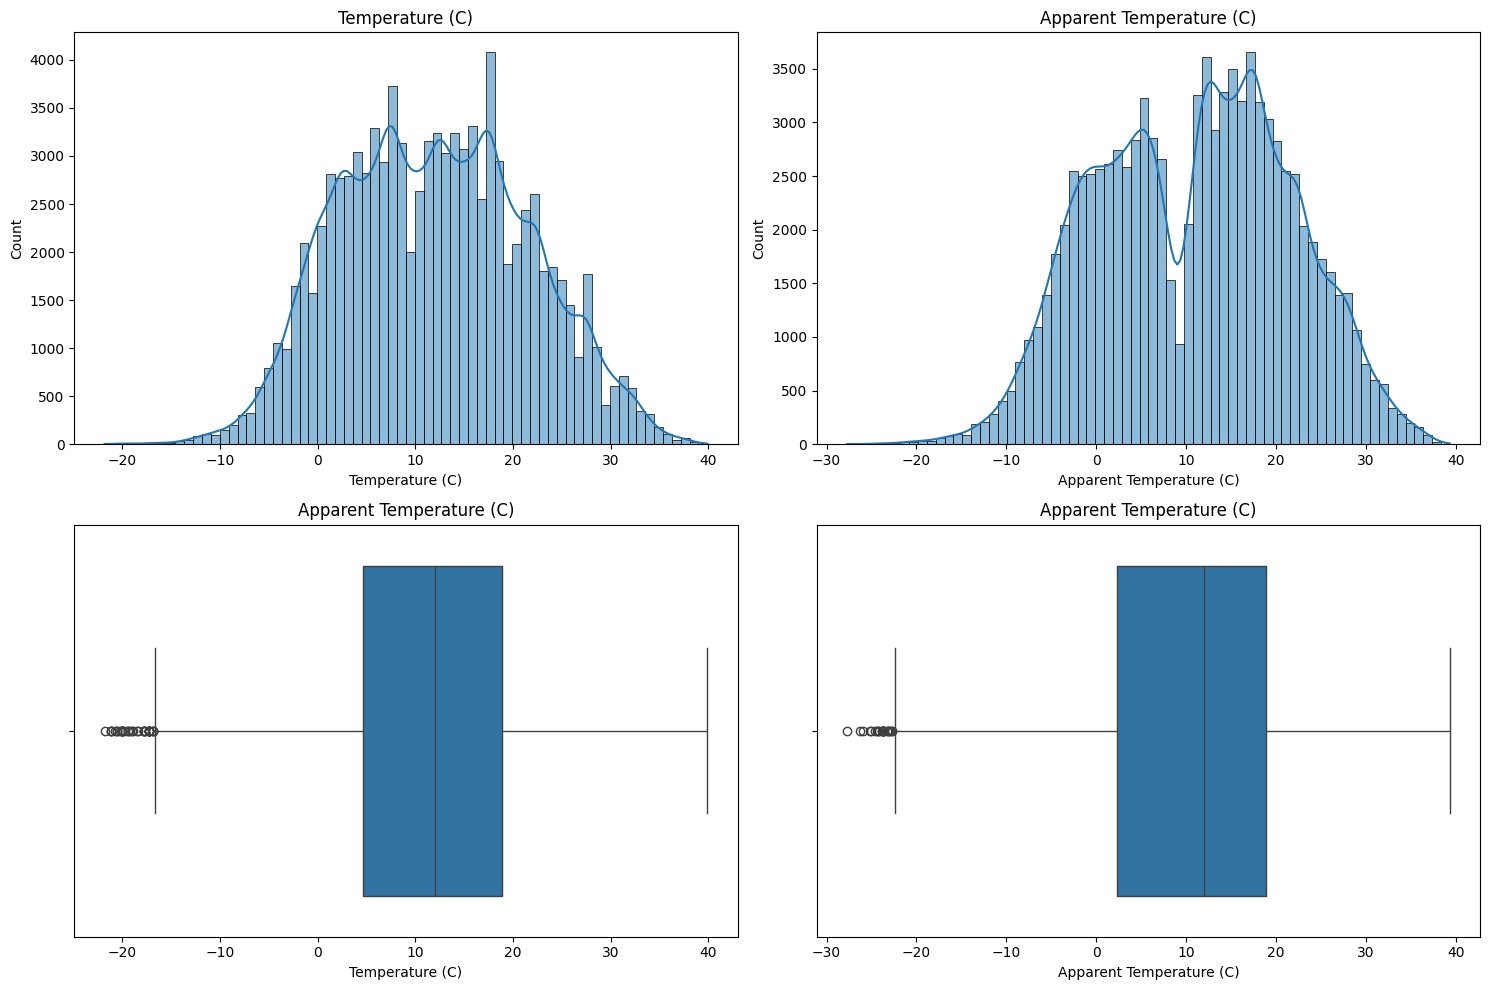

In [162]:
# Numeric Columns
# Target columns
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df, x="Temperature (C)", bins=68, kde=True)
plt.title("Temperature (C)")

plt.subplot(2, 2, 2)
sns.histplot(df, x="Apparent Temperature (C)", bins=68, kde=True)
plt.title("Apparent Temperature (C)")

plt.subplot(2, 2, 3)
sns.boxplot(df, x="Temperature (C)")
plt.title("Apparent Temperature (C)")

plt.subplot(2, 2, 4)
sns.boxplot(df, x="Apparent Temperature (C)")
plt.title("Apparent Temperature (C)")

plt.tight_layout()
plt.show()

- They have similar distributions.
- They have some outliers, but we can ignore them.

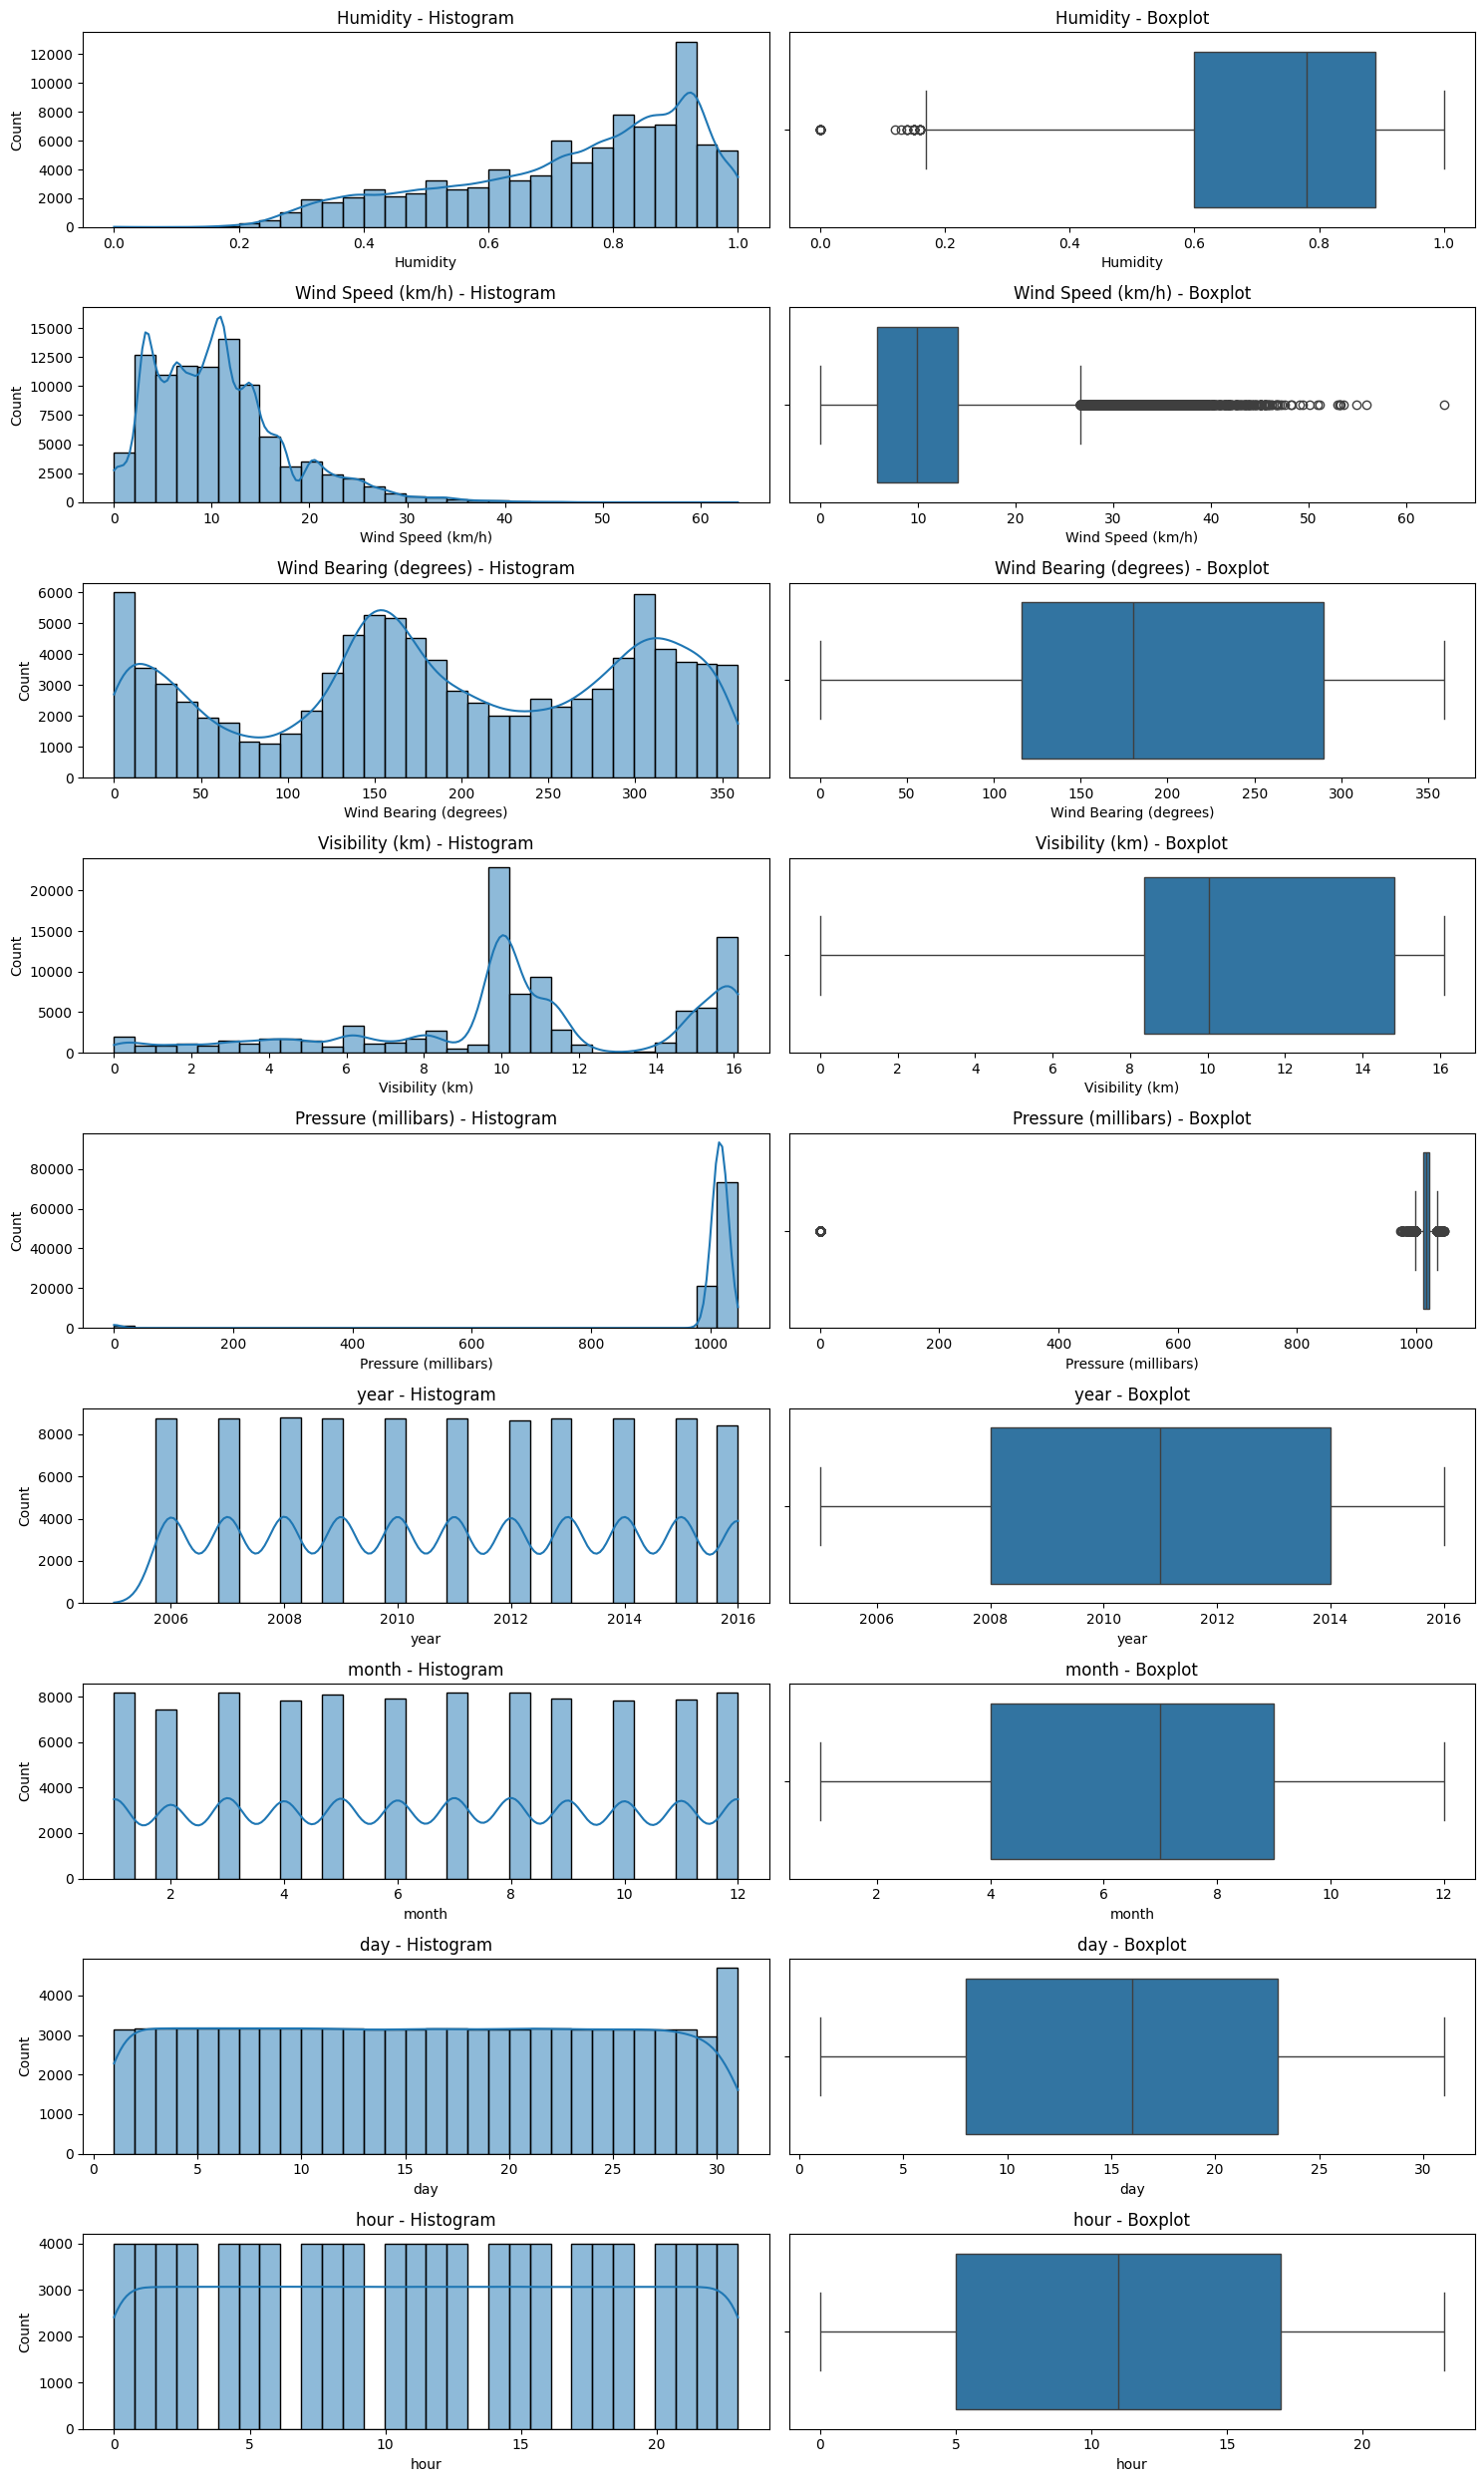

In [163]:
# Other Numeric Columns
columns = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
           'Visibility (km)', 'Pressure (millibars)', "year", "month", "day", "hour"]

plt.figure(figsize=(15, 25))

for i, col in enumerate(columns, 1):
    # Histogram
    plt.subplot(len(columns), 2, 2*i-1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} - Histogram")
    
    # Boxplot
    plt.subplot(len(columns), 2, 2*i)
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")


plt.tight_layout()
plt.show()

- I will remove rows with Humidity = 0, since 0% humidity is unrealistic and most likely due to measurement errors or missing data.
- We should delete the outliers in the Pressure. We can't analyze it with them.

In [164]:
df[df["Pressure (millibars)"] < 500].shape

(1288, 14)

In [165]:
df = df[df["Pressure (millibars)"] > 500]
df = df[df["Humidity"] != 0]
df.reset_index(drop=True, inplace=True)

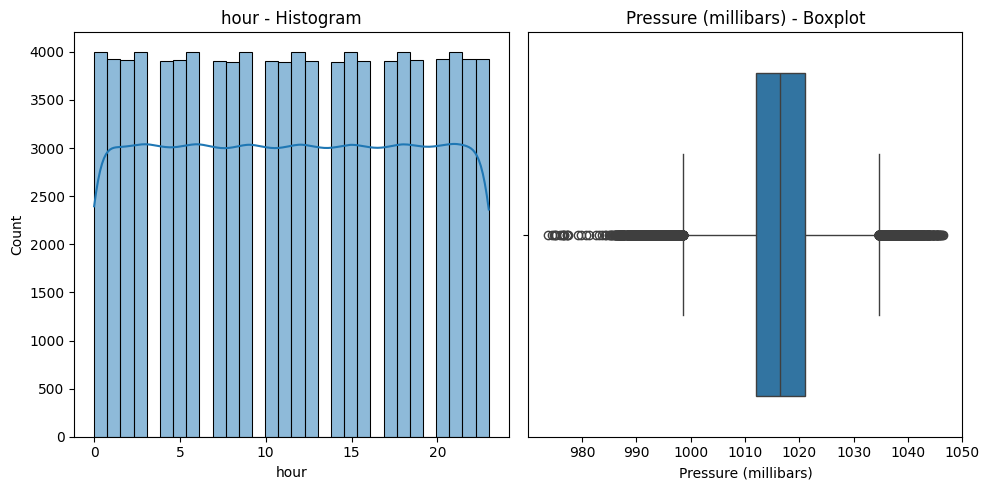

In [166]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[col], bins=30, kde=True)
plt.title(f"{col} - Histogram")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Pressure (millibars)"])
plt.title("Pressure (millibars) - Boxplot")

plt.tight_layout()
plt.show()

- Now, we can easily analyze the pressure data.

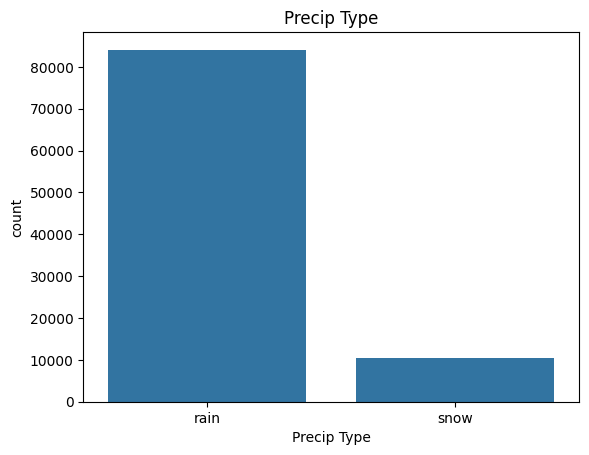

In [167]:
# categoric columns
sns.countplot(x=df["Precip Type"])
plt.title("Precip Type")
plt.show()

- Approximately 90% of the sample is rain.

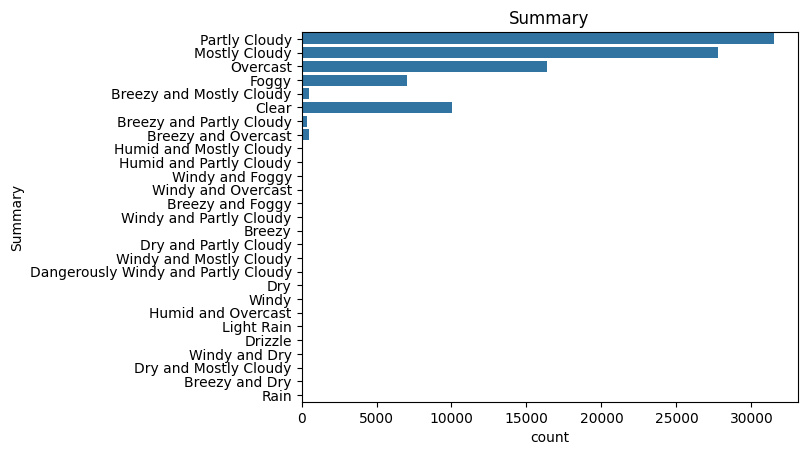

In [168]:
sns.countplot(df["Summary"])
plt.title("Summary")
plt.show()

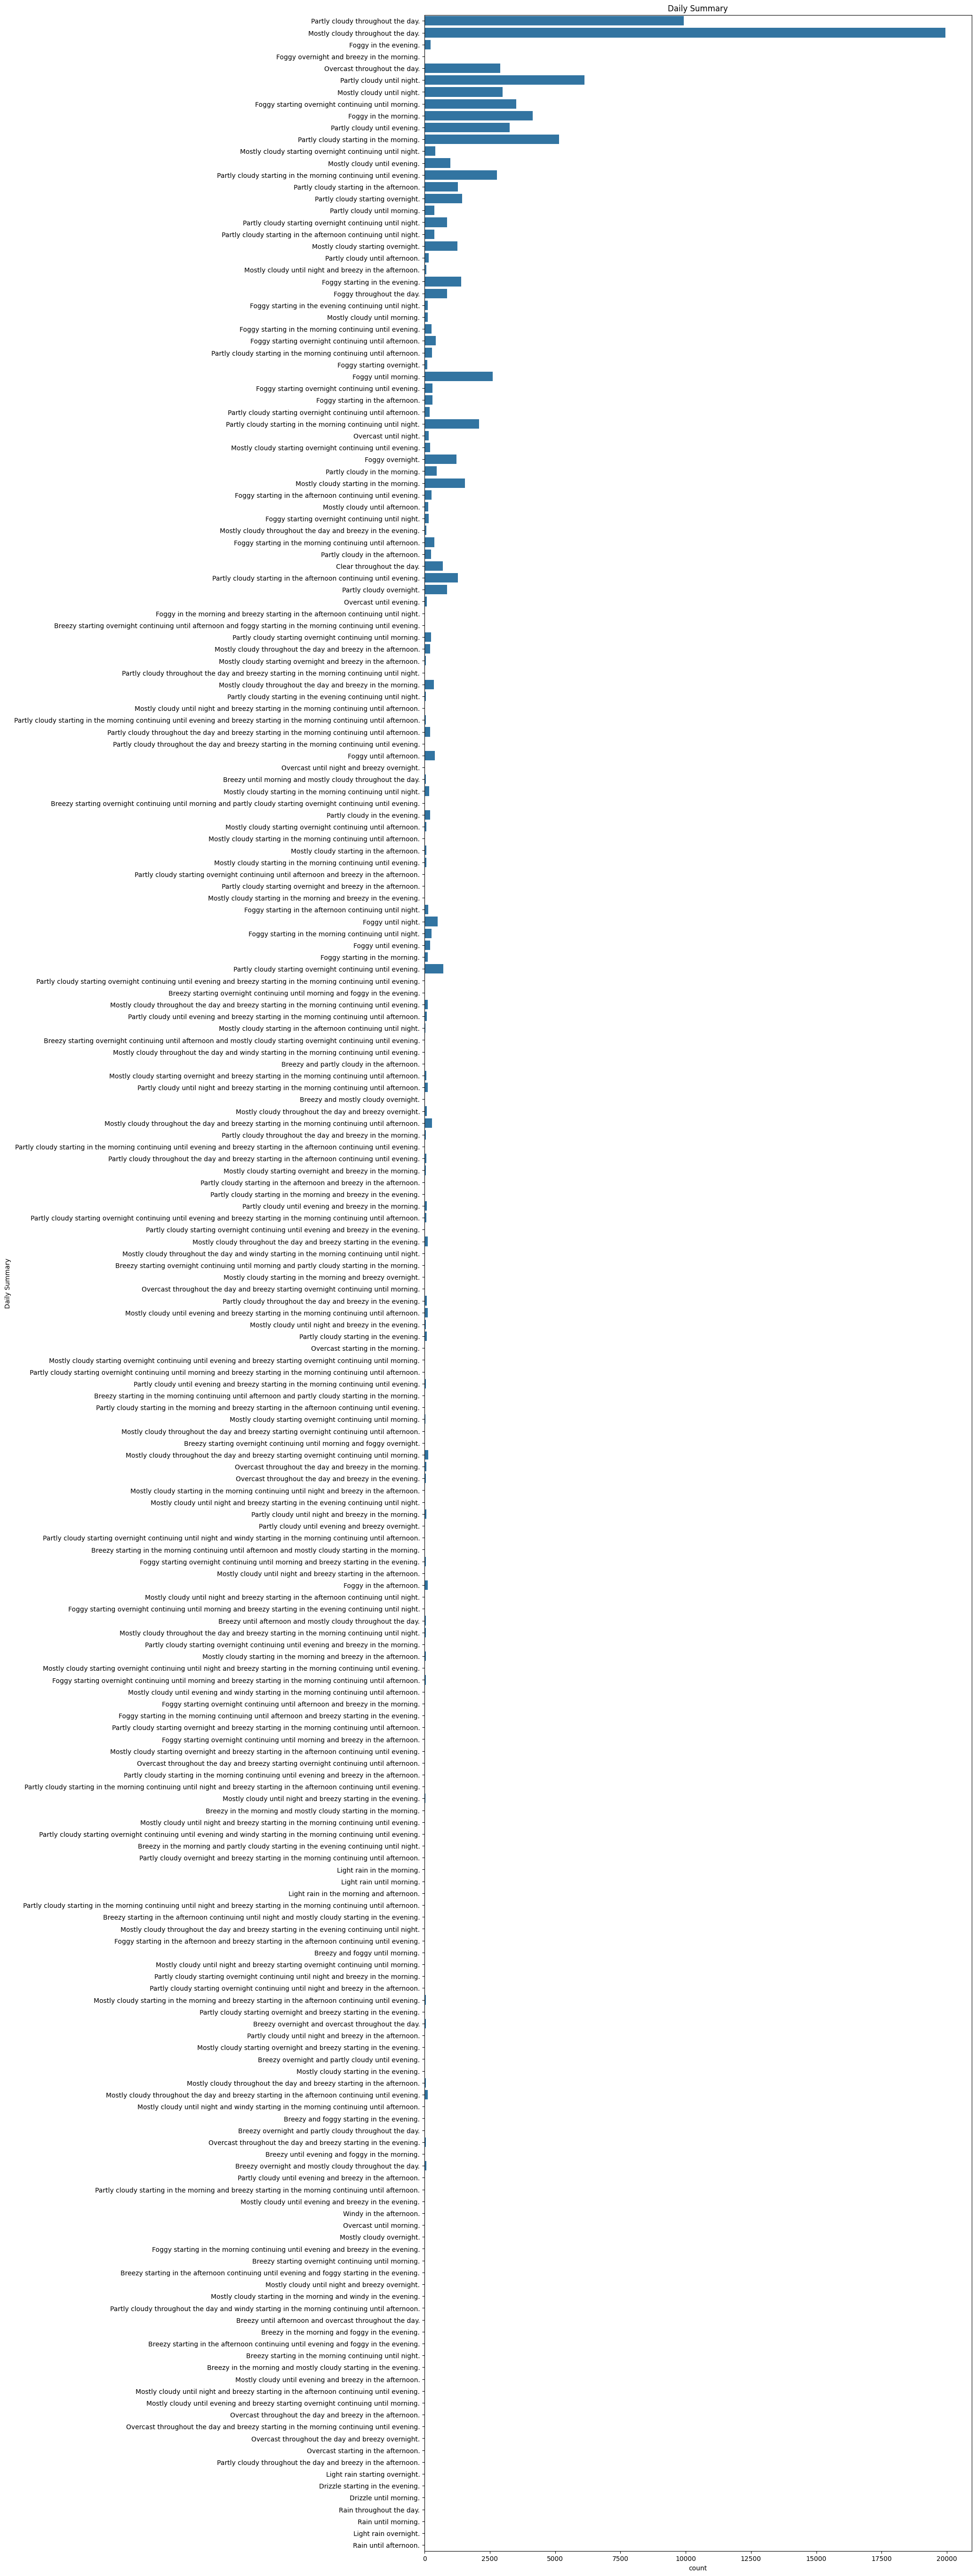

In [169]:
plt.figure(figsize=(15, 70))
sns.countplot(df["Daily Summary"])
plt.title("Daily Summary")
plt.show()

- **Summary** column provides valuable information about overall weather conditions (e.g., cloudy, rainy, foggy) and is therefore retained as a categorical feature for the regression model. On the other hand, **Daily Summary** column contains over 200 unique categories, many of which are rare and redundant. Encoding this high-cardinality field would add unnecessary complexity without much predictive value. For this reason, I have chosen to drop **Daily Summary** while keeping **Summary** for modeling.

In [170]:
df = df.drop("Daily Summary", axis=1)

### Relations with the target columns

#### Humidity vs Temperature and Apparent Temperature

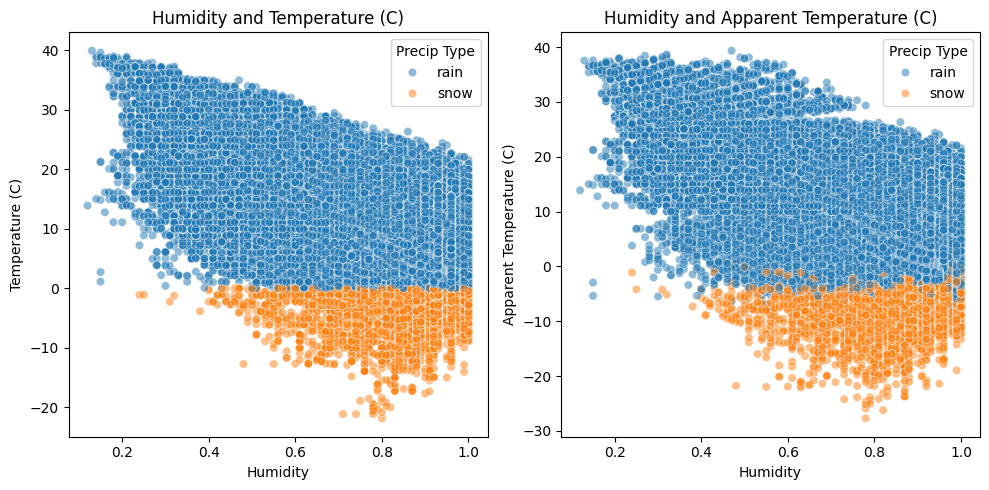

In [171]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(df, x="Humidity", y="Temperature (C)", hue="Precip Type", alpha=0.5)
plt.title("Humidity and Temperature (C)")

plt.subplot(1, 2, 2)
sns.scatterplot(df, x="Humidity", y="Apparent Temperature (C)", hue="Precip Type", alpha=0.5)
plt.title("Humidity and Apparent Temperature (C)")

plt.tight_layout()
plt.show()

- A scatterplot of Humidity versus Temperature (C) (and similarly for Apparent Temperature) shows no strong overall correlation between humidity and temperature. However, the plot reveals that Precip Type influences temperature patterns, as expected.

#### Wind Speed vs Temperature and Apparent Temperature

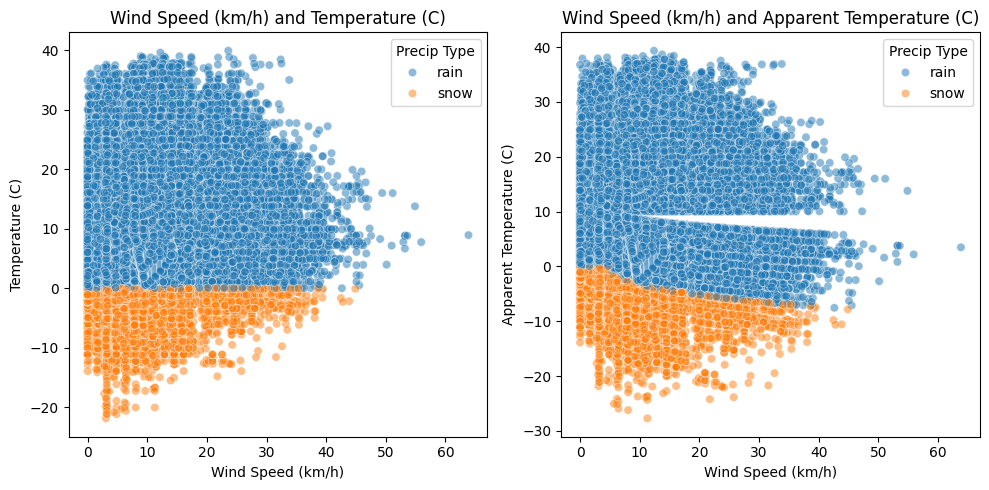

In [172]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(df, x="Wind Speed (km/h)", y="Temperature (C)", hue="Precip Type", alpha=0.5)
plt.title("Wind Speed (km/h) and Temperature (C)")

plt.subplot(1, 2, 2)
sns.scatterplot(df, x="Wind Speed (km/h)", y="Apparent Temperature (C)", hue="Precip Type", alpha=0.5)
plt.title("Wind Speed (km/h) and Apparent Temperature (C)")

plt.tight_layout()
plt.show()

- A scatterplot of Wind Speed (km/h) versus Temperature (C) (and Apparent Temperature) shows no clear correlation, similar to the humidity plots

#### Wind Bearing vs Temperature and Apparent Temperature

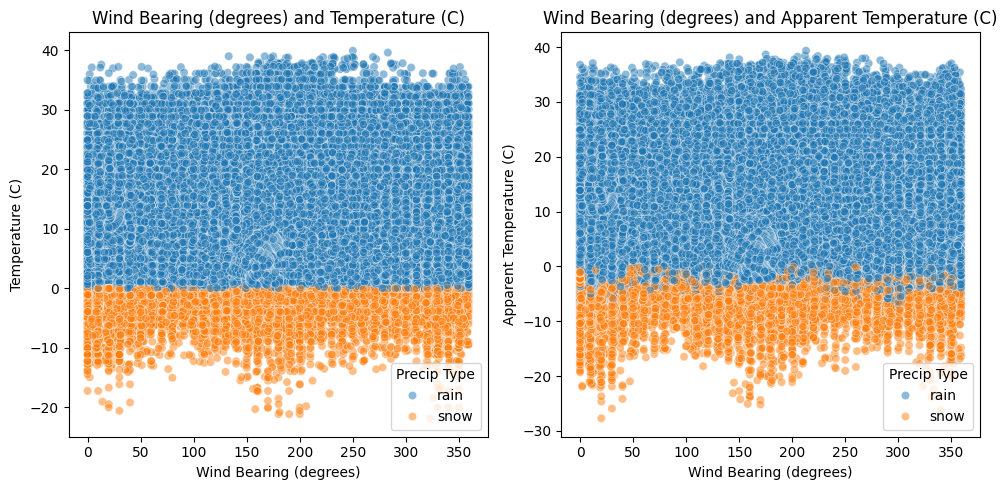

In [173]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(df, x="Wind Bearing (degrees)", y="Temperature (C)", hue="Precip Type", alpha=0.5)
plt.title("Wind Bearing (degrees) and Temperature (C)")

plt.subplot(1, 2, 2)
sns.scatterplot(df, x="Wind Bearing (degrees)", y="Apparent Temperature (C)", hue="Precip Type", alpha=0.5)
plt.title("Wind Bearing (degrees) and Apparent Temperature (C)")

plt.tight_layout()
plt.show()

- Again no clear correlation.

#### Visibility (km) vs Temperature and Apparent Temperature

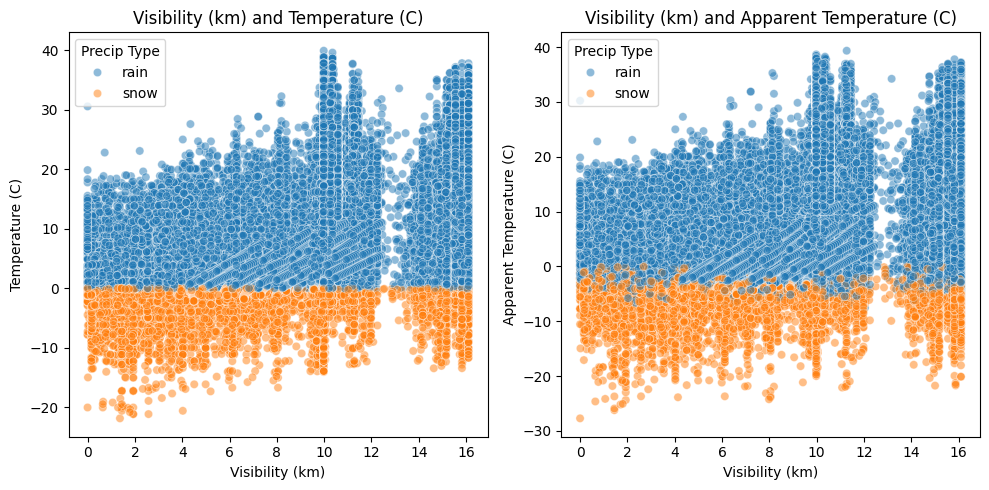

In [174]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(df, x="Visibility (km)", y="Temperature (C)", hue="Precip Type", alpha=0.5)
plt.title("Visibility (km) and Temperature (C)")

plt.subplot(1, 2, 2)
sns.scatterplot(df, x="Visibility (km)", y="Apparent Temperature (C)", hue="Precip Type", alpha=0.5)
plt.title("Visibility (km) and Apparent Temperature (C)")

plt.tight_layout()
plt.show()

#### Pressure (millibars) vs Temperature and Apparent Temperature

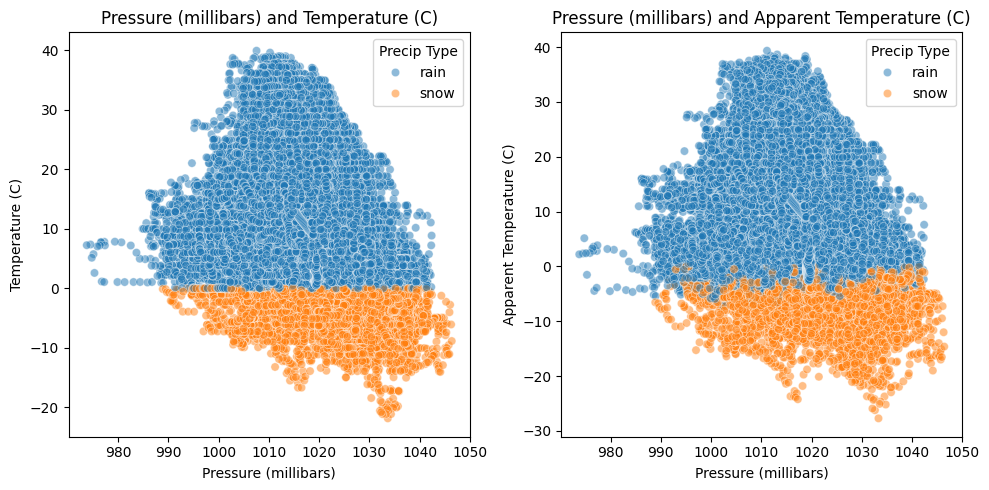

In [175]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(df, x="Pressure (millibars)", y="Temperature (C)", hue="Precip Type", alpha=0.5)
plt.title("Pressure (millibars) and Temperature (C)")

plt.subplot(1, 2, 2)
sns.scatterplot(df, x="Pressure (millibars)", y="Apparent Temperature (C)", hue="Precip Type", alpha=0.5)
plt.title("Pressure (millibars) and Apparent Temperature (C)")

plt.tight_layout()
plt.show()

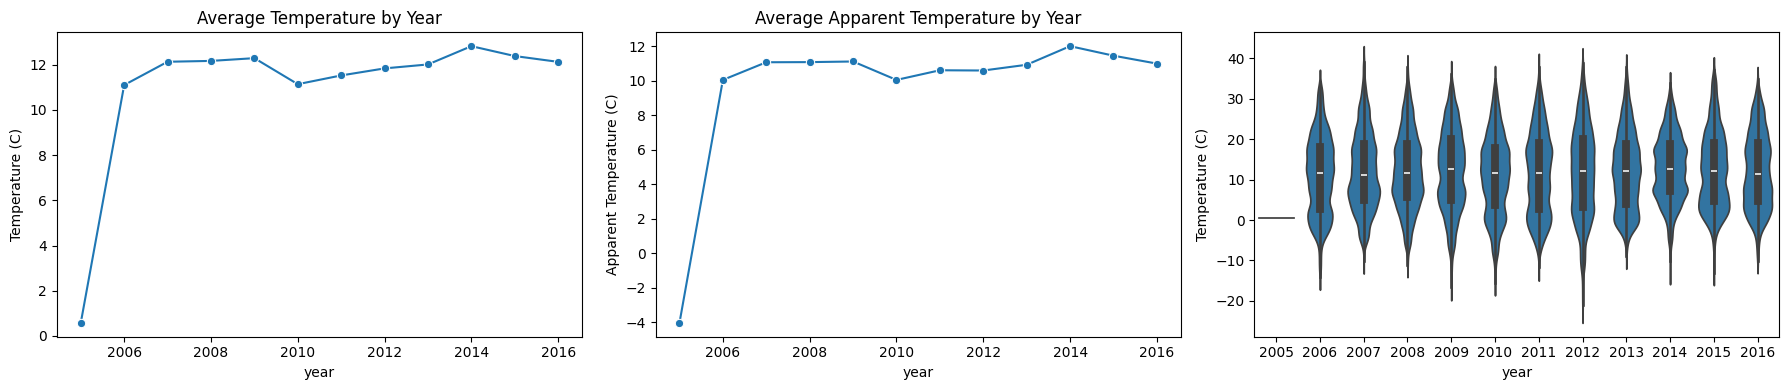

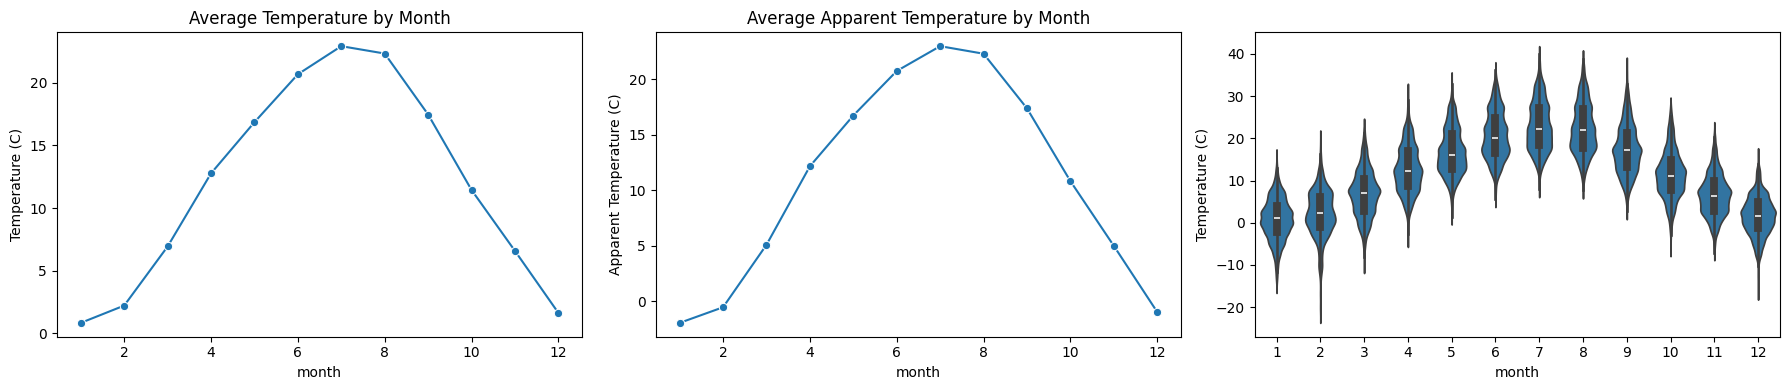

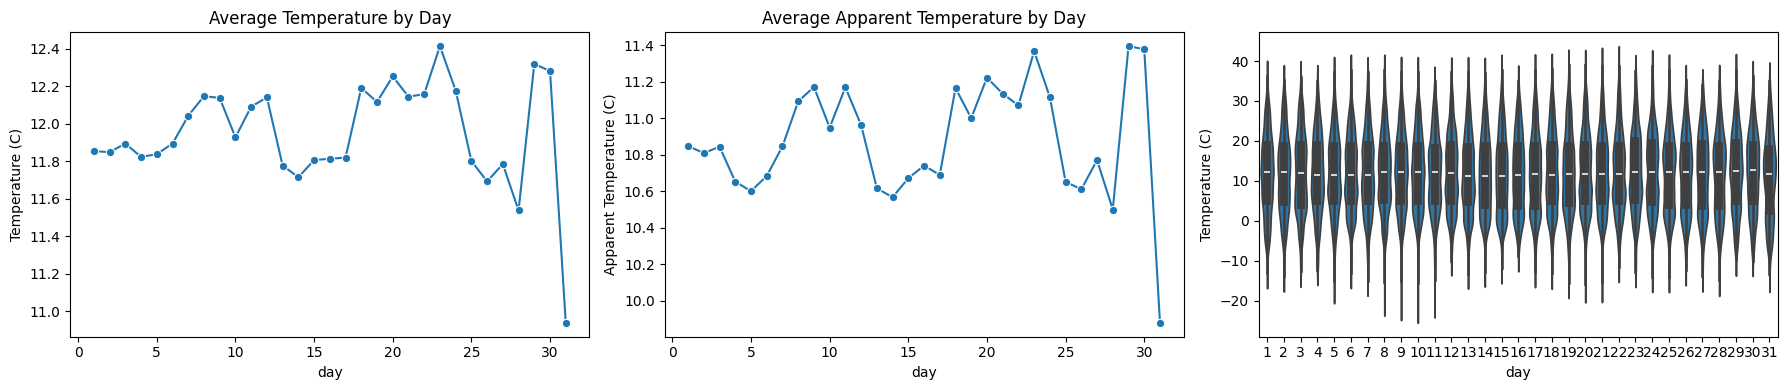

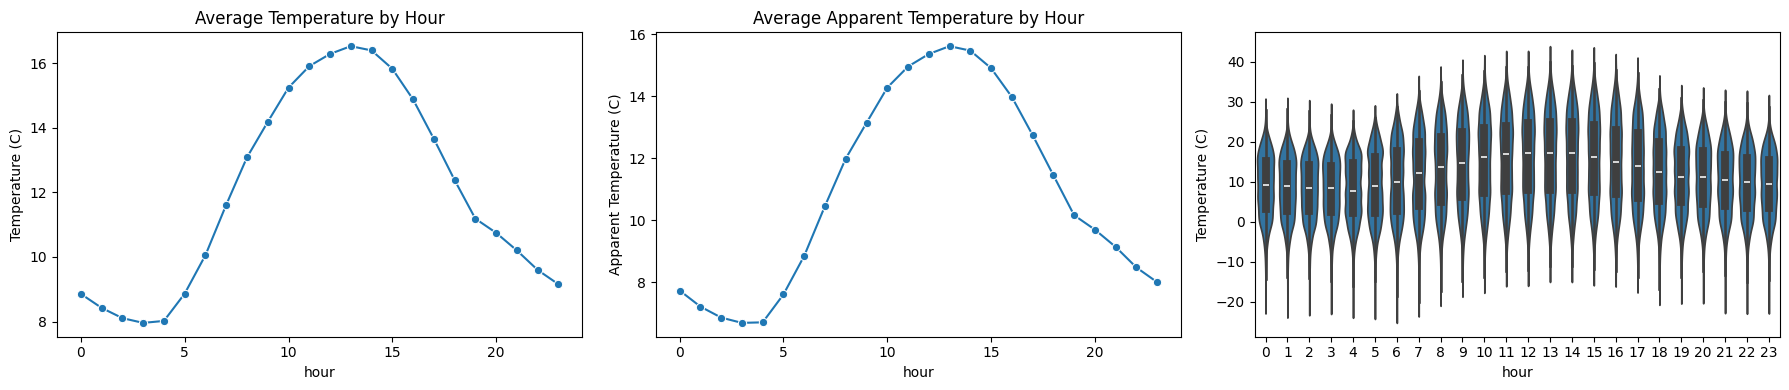

In [199]:
time_units = ["year", "month", "day", "hour"]

for unit in time_units:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    
    avg_temp = df.groupby(unit)["Temperature (C)"].mean().reset_index()
    sns.lineplot(data=avg_temp, x=unit, y="Temperature (C)", marker="o", ax=axes[0])
    axes[0].set_title(f"Average Temperature by {unit.capitalize()}")
    
    avg_app_temp = df.groupby(unit)["Apparent Temperature (C)"].mean().reset_index()
    sns.lineplot(data=avg_app_temp, x=unit, y="Apparent Temperature (C)", marker="o", ax=axes[1])
    axes[1].set_title(f"Average Apparent Temperature by {unit.capitalize()}")

    sns.violinplot(df, x=unit, y="Temperature (C)")

    plt.tight_layout()
    plt.show()

- After visualizing the average Temperature and Apparent Temperature across different time units, it became apparent that the trends for month and hour are non-linear, resembling a curved or parabolic pattern. To better capture these seasonal and daily fluctuations, I have decided to apply polynomial features to the month and hour columns in the regression model.

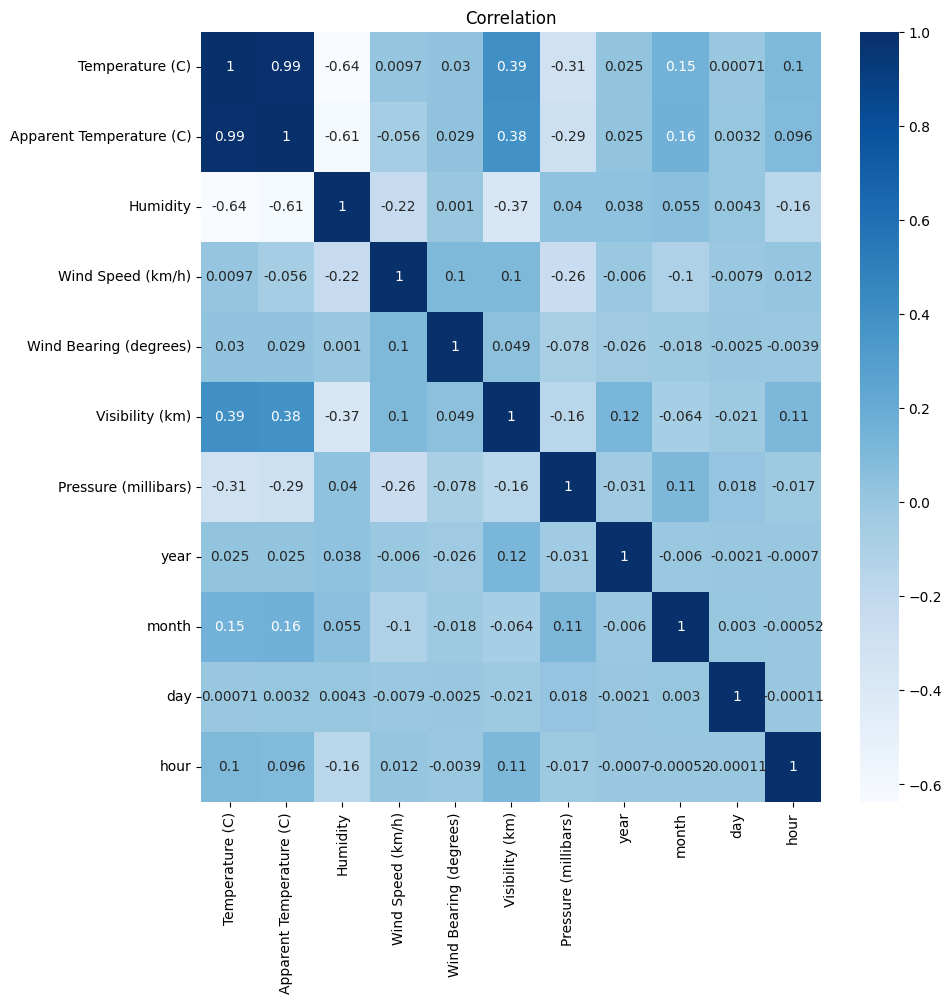

In [184]:
num_cols = df.select_dtypes(include="number").columns.tolist()
corr = df[num_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation")
plt.show()

- Based on the correlation heatmap, we observe that features such as pressure, visibility, and humidity show meaningful relationships with our target variables, Temperature and Apparent Temperature. Therefore, these features will be included as inputs for the regression models.

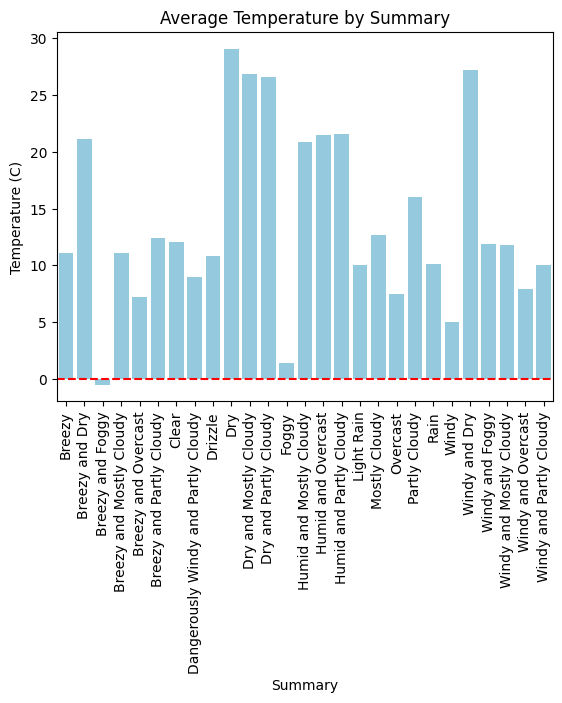

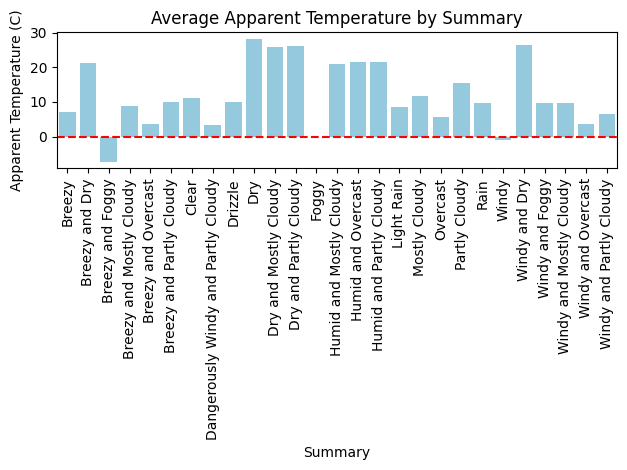

In [200]:
avg_app_temp = df.groupby("Summary")["Temperature (C)"].mean().reset_index()
sns.barplot(data=avg_app_temp, x="Summary", y="Temperature (C)", color="skyblue")
plt.axhline(0, color="red", linestyle="--")
plt.xticks(rotation=90)
plt.title("Average Temperature by Summary")
plt.show()

avg_app_temp = df.groupby("Summary")["Apparent Temperature (C)"].mean().reset_index()
sns.barplot(data=avg_app_temp, x="Summary", y="Apparent Temperature (C)", color="skyblue")
plt.axhline(0, color="red", linestyle="--")
plt.title("Average Apparent Temperature by Summary")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Regression for Temperature

In [226]:
# input features
linear_features = ["Humidity", "Visibility (km)", "Pressure (millibars)"]
poly_features = ["month", "hour"]
categorical_features = ["Summary", "Precip Type"]

In [227]:
X = df[linear_features + poly_features + categorical_features]
y = df["Temperature (C)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
# Polynomial features and scaling
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train[poly_features])
X_test_poly = poly.transform(X_test[poly_features])

scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

In [229]:
# Linear feature scaling
scaler_linear = StandardScaler()
X_train_linear_scaled = scaler_linear.fit_transform(X_train[linear_features])
X_test_linear_scaled = scaler_linear.transform(X_test[linear_features])

In [230]:
# Categorical features encoding
encoder = OneHotEncoder(sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])

In [231]:
X_train_final = np.hstack([X_train_poly_scaled, X_train_linear_scaled, X_train_cat])
X_test_final = np.hstack([X_test_poly_scaled, X_test_linear_scaled, X_test_cat])

In [232]:
# Model
model = LinearRegression()
model.fit(X_train_final, y_train)

LinearRegression()

In [234]:
y_pred_train = model.predict(X_train_final)
y_pred_test = model.predict(X_test_final)

In [235]:
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Train R^2:", r2_score(y_train, y_pred_train))
print("Test R^2:", r2_score(y_test, y_pred_test))

Train RMSE: 4.130729952120882
Test RMSE: 4.129547255389091
Train R^2: 0.8130961640946084
Test R^2: 0.813725294102559


In [236]:
def residual_plot(y_true, y_pred, by='pred'):
    resid = y_true - y_pred
    x = y_pred if by == 'pred' else y_true
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=x, y=resid, alpha=0.6, s=20)
    plt.axhline(0, color='r', ls='--')
    plt.xlabel('Prediction (ŷ)' if by == 'pred' else 'Actual (y)')
    plt.ylabel('Residual (y - ŷ)')
    plt.title('Residual plot')
    plt.tight_layout()
    plt.show()

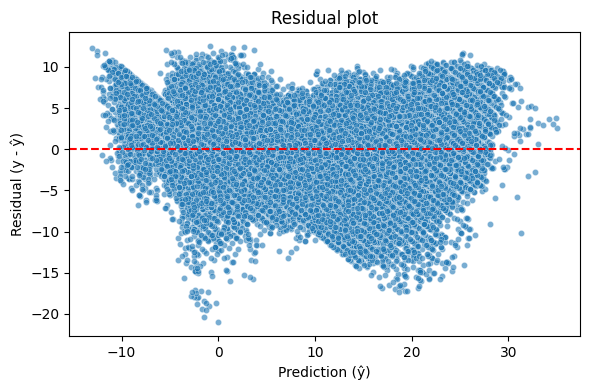

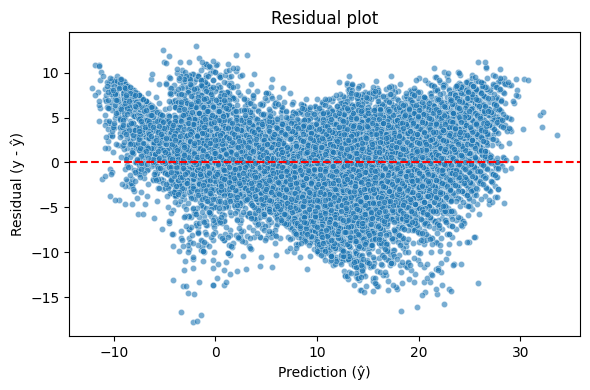

In [237]:
residual_plot(y_train, y_pred_train)
residual_plot(y_test, y_pred_test)

In [238]:
def residual_dist(y_true, y_pred):
    resid = y_true - y_pred
    plt.figure(figsize=(6,4))
    sns.histplot(resid, kde=True)
    plt.axvline(0, color='r', ls='--')
    plt.xlabel('Residual')
    plt.title('Residual Distribution')
    plt.tight_layout()
    plt.show()

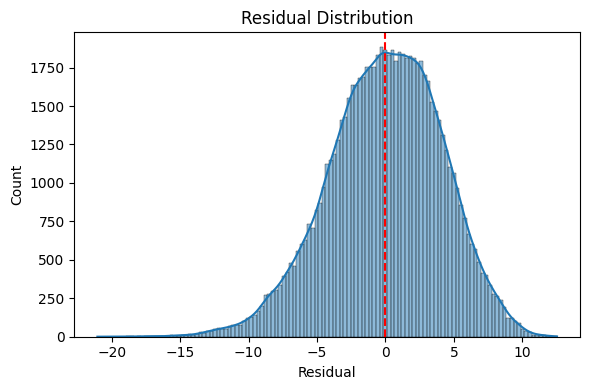

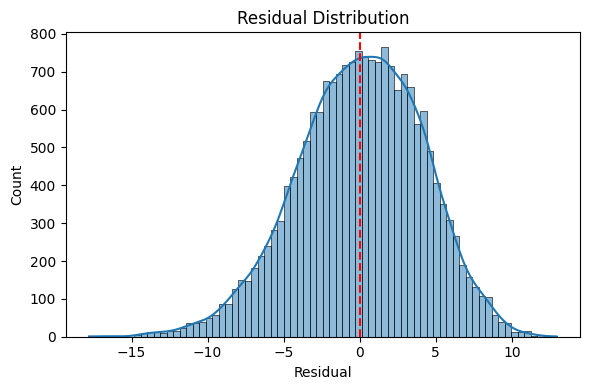

In [239]:
residual_dist(y_train, y_pred_train)
residual_dist(y_test, y_pred_test)